In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#Goal - Sample from BiVariate Normal

In [3]:
automatic_samples = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 10000)

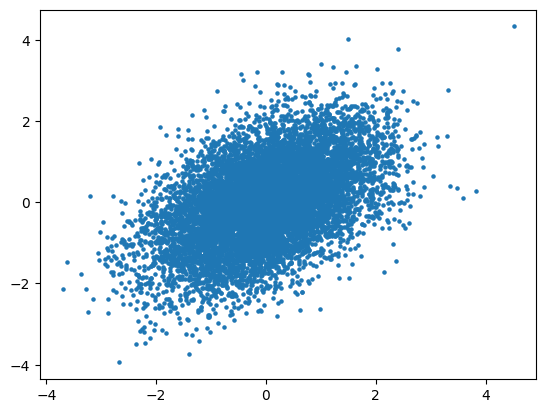

In [4]:
plt.scatter(automatic_samples[:, 0], automatic_samples[:, 1], s = 5)

#Gibbs Sampling

In [5]:
samples = {'x': [1], 'y': [-1]}

num_samples = 10000

for _ in range(num_samples):
    curr_y = samples['y'][-1]
    new_x = np.random.normal(curr_y / 2, np.sqrt(3/4))
    new_y = np.random.normal(new_x / 2, np.sqrt(3 / 4))
    samples['x'].append(new_x)
    samples['y'].append(new_y)

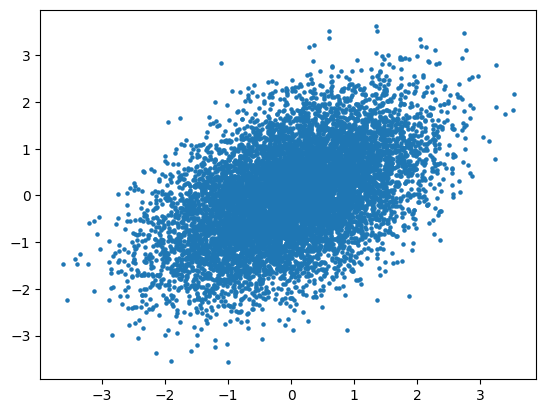

In [6]:
plt.scatter(samples['x'], samples['y'], s = 5)

#Marginal Distribution of x

(array([0.00139873, 0.00195822, 0.01091007, 0.02881377, 0.05091366,
        0.1091007 , 0.17064468, 0.24925313, 0.32786158, 0.39555996,
        0.38856633, 0.34548554, 0.29233392, 0.19274456, 0.12112975,
        0.06238322, 0.03245046, 0.01174931, 0.00279745, 0.00167847]),
 array([-3.61880389, -3.2613717 , -2.90393952, -2.54650733, -2.18907515,
        -1.83164296, -1.47421077, -1.11677859, -0.7593464 , -0.40191421,
        -0.04448203,  0.31295016,  0.67038235,  1.02781453,  1.38524672,
         1.74267891,  2.10011109,  2.45754328,  2.81497547,  3.17240765,
         3.52983984]),
 <BarContainer object of 20 artists>)

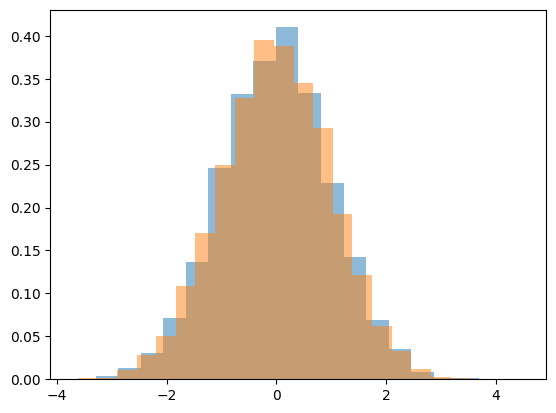

In [7]:
plt.hist(automatic_samples[:, 0], bins = 20, density = True, alpha = 0.5)
plt.hist(samples['x'], bins = 20, density = True, alpha = 0.5)

#Marginal Distribution of y

(array([0.00138913, 0.00333391, 0.00916825, 0.030283  , 0.05612079,
        0.11946505, 0.1891993 , 0.26087833, 0.36061776, 0.37311992,
        0.39034511, 0.35756168, 0.26004486, 0.17336324, 0.09807247,
        0.05056428, 0.03000518, 0.0086126 , 0.00472304, 0.00166695]),
 array([-3.57716329, -3.21726138, -2.85735946, -2.49745755, -2.13755564,
        -1.77765372, -1.41775181, -1.0578499 , -0.69794799, -0.33804607,
         0.02185584,  0.38175775,  0.74165967,  1.10156158,  1.46146349,
         1.8213654 ,  2.18126732,  2.54116923,  2.90107114,  3.26097305,
         3.62087497]),
 <BarContainer object of 20 artists>)

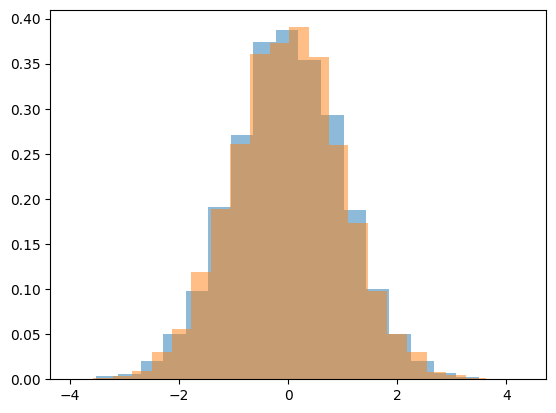

In [8]:
plt.hist(automatic_samples[:, 1], bins = 20, density = True, alpha = 0.5)
plt.hist(samples['y'], bins = 20, density = True, alpha = 0.5)

-0.005329976923231833


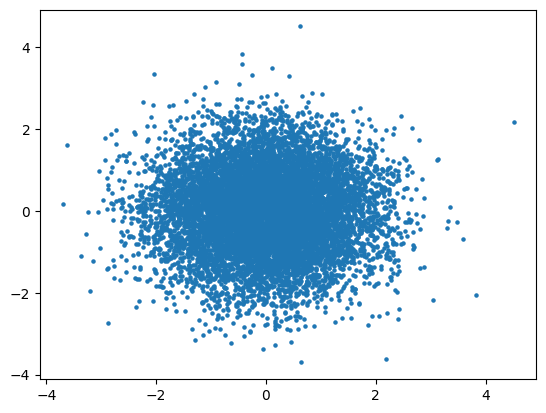

In [9]:
plt.scatter(automatic_samples[:-1, 0], automatic_samples[1:, 0], s = 5)
print(pearsonr(automatic_samples[:-1, 0], automatic_samples[1:, 0])[0]) #no correlation b/w previous and new x values by built in normal distribution method

0.25500221731646605


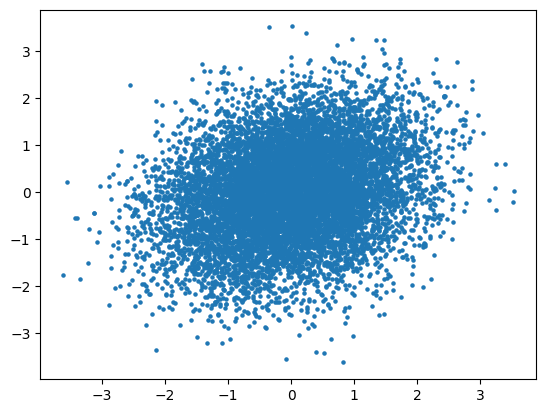

In [10]:
plt.scatter(samples['x'][:-1], samples['x'][1:], s = 5)
print(pearsonr(samples['x'][:-1], samples['x'][1:])[0]) #from-gibbs-sampling-method-there is correlation b/w previous x samples and the new x samples, we can see a tilted plot and the value